<a href="https://colab.research.google.com/github/messerb5467/kaggle-competitions/blob/main/bike_pedestrian_img_classification/bike_and_pedestrian_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Number of bikes vs number of pedestrians in an image

The goal of this task is to write an object detection model for the below picture that will help us keep track of the number of pedestrians in a picture vs the number of bicyclists in the picture and output a counter of what was gathered in the process:
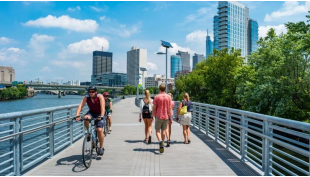

In [43]:
import torch
from collections import Counter

In [44]:
# Inspiration for this solution taken from
# https://github.com/ultralytics/yolov5/issues/36
img = 'pedestrians-vs-bicyclists.png'
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-12-9 Python-3.8.16 torch-1.13.0+cu116 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [45]:
results = model(img)

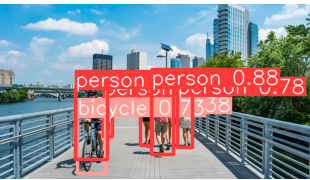

In [46]:
results.show()

In [47]:
df = results.pandas().xyxy[0]

In [48]:
results = Counter(df["name"])
# The algorithm differentiates between a person riding 
# a bike and their bike, so we adjust the results 
# back down if any bikes are detected.
if results["bicycle"] > 0:
  results["person"] -= results["bicycle"]
results

Counter({'person': 3, 'bicycle': 2})

I did review solutions with both [Tensorflow Object Counting API](https://github.com/ahmetozlu/tensorflow_object_counting_api) which wasn't as well maintained as I would have wanted for use commercially (and would also need an appropriate license check for shipment into product) and [OpenCV Cascade Classifier with Haar cascades](https://docs.opencv.org/4.6.0/d1/de5/classcv_1_1CascadeClassifier.html), but I couldn't get the classifier to work w/o training my own haar cascade which seemed much for this problem.

Because of this simplicity though, I assume that two bikes riding in a line won't appreciably add to expansion costs meanwhile two bikes riding in tandem will be better caught by the installed camera angle.